<img style="float: left;" src="pic2.png">

# Project Solution

## Classification of Diabetes

<img style = 'float:left;' src=diab.jpg>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

## 1. Data Collection

### E.1 Load pima indians diabetes dataset and show first 3 rows

In [2]:
pima = pd.read_csv('pima.csv') # Load pima.csv file
pima.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


## 2. Data Exploration and Visualization

### E.2 Preliminary exploration

**shape**

In [3]:
pima.shape

(768, 9)

**Identify # of positives and negatives in the Outcome variable**

In [4]:
pima['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

**Get some basic statistics**

In [5]:
pima.describe() # get some basic info on each variable

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### E.3 Get a correlation matrix plot for independent variables

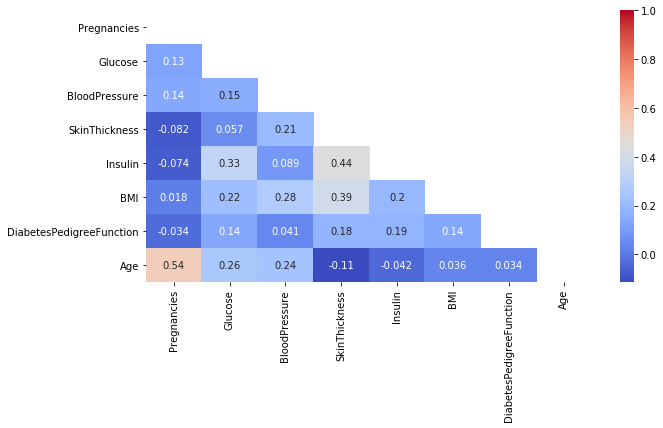

In [6]:
corm = pima.iloc[:,:-1].corr()

masko = np.zeros_like(corm, dtype = np.bool)
masko[np.triu_indices_from(masko)] = True
fig, ax = plt.subplots(figsize = (10,5))
sns.heatmap(corm, mask = masko, cmap = 'coolwarm', annot=True)

## 3. Data Preparation

### E.4 Seperate independent variables into a X data frame, and target variable into y series. show first few rows

In [7]:
X = pima.loc[:,pima.columns != 'Outcome']
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [8]:
## y series
y = pima.loc[:,'Outcome']
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

## 4. Train/Test Split

### E.5 Split the data into training (X_train,y_train) and test data (X_test, y_test)

**print the shapes**

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10)
print ('Dimensions of X_train: ', X_train.shape)
print ('Dimensions of X_test: ', X_test.shape)
print ('Dimensions of y_train: ', y_train.shape)
print ('Dimensions of y_test: ', y_test.shape)

Dimensions of X_train:  (576, 8)
Dimensions of X_test:  (192, 8)
Dimensions of y_train:  (576,)
Dimensions of y_test:  (192,)


## 5. Apply Machine Learning models for Classification

### E.6 Train a Dummy Classifier

**strategy = 'most_frequent', random_state=0**

In [11]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [12]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score

dummy = DummyClassifier(strategy = 'most_frequent', random_state=0)
dummy.fit(X_train, y_train)

DummyClassifier(constant=None, random_state=0, strategy='most_frequent')

**Make predictions on test data and print a confusion matrix on dummy classifier for test data**

In [13]:
ydummy_test = dummy.predict(X_test)
print ('Confusion matrix for DummyClassifier is : \n \n', confusion_matrix(y_test,ydummy_test))

Confusion matrix for DummyClassifier is : 
 
 [[121   0]
 [ 71   0]]


**Accuracy score of dummy classifier on test data**

In [14]:
print ('Accuracy score for DummyClassifier is : \n \n', accuracy_score(y_test, ydummy_test))

Accuracy score for DummyClassifier is : 
 
 0.6302083333333334


### 5.1 Logistic Regression

### E.7 Train a logistic regression model on the training data

In [15]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression(random_state=0)
logr.fit(X_train, y_train)

/Users/rajpardasani/anaconda3/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### E.8 Predictions & Confusion matrix

**Make predictions on training and test data. Print first 8 values.**

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score

ypred_train = logr.predict(X_train)
ypred_test = logr.predict(X_test)

print ('First 8 Predictions for training data are: ', ypred_train[:8])
print ('First 8 Predictions for test data are: ', ypred_test[:8])

First 8 Predictions for training data are:  [1 0 1 0 0 0 0 1]
First 8 Predictions for test data are:  [1 0 0 0 0 0 0 0]


**Print confusion Matrix for both training and test data sets**

In [18]:
print ('confusion matrix for training data is : \n', confusion_matrix(y_train,ypred_train), '\n', '\n')
print ('confusion_matrix for test data is : \n', confusion_matrix(y_test,ypred_test), '\n')

confusion matrix for training data is : 
 [[343  36]
 [ 86 111]] 
 

confusion_matrix for test data is : 
 [[109  12]
 [ 43  28]] 



### E.9 Accuracy, Recall & Precision

**Print accuracy, recall, and precision for Training Data**

In [19]:
print ('Accuracy for train data is : \n', accuracy_score(y_train,ypred_train), '\n')
print ('Recall for train data is : \n', recall_score(y_train,ypred_train), '\n')
print ('Precision for train data is : \n', precision_score(y_train,ypred_train), '\n')

Accuracy for train data is : 
 0.7881944444444444 

Recall for train data is : 
 0.5634517766497462 

Precision for train data is : 
 0.7551020408163265 



**Print accuracy, recall, and precision for Test Data**

In [20]:
print ('Accuracy for test data is : \n', accuracy_score(y_test,ypred_test), '\n')
print ('Recall for test data is : \n', recall_score(y_test,ypred_test), '\n')
print ('Precision for test data is : \n', precision_score(y_test,ypred_test), '\n')

Accuracy for test data is : 
 0.7135416666666666 

Recall for test data is : 
 0.39436619718309857 

Precision for test data is : 
 0.7 



### E.10 Predicting probabilities on test data. Print first 5 probabilities of 'Outcome' variable being 1 (Optional)

In [21]:
## Print only first five probabilities
yprob_test = logr.predict_proba(X_test)
yprob_test[0:5,1] # Probabilities that the target variable is 0, 1

array([0.53448007, 0.21402809, 0.48086738, 0.16571099, 0.14043783])

### E.11 ROC Curves and AUC values (Optional)

In [22]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

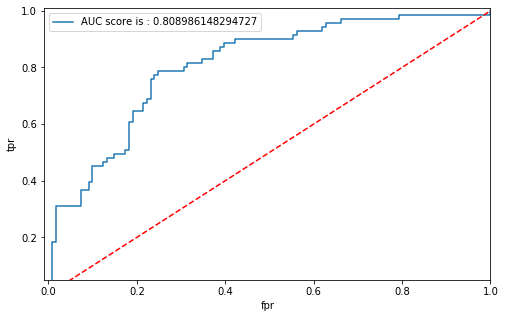

In [23]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

fpr_logr, tpr_logr,_ = roc_curve(y_test,yprob_test[:,1])
auc_logr = auc(fpr_logr, tpr_logr)

fig = plt.figure(figsize = (8,5))

plt.plot(fpr_logr,tpr_logr, label = 'AUC score is : ' + str(auc_logr))
plt.xlabel('fpr', fontsize = 10)
plt.ylabel('tpr', fontsize = 10)
plt.xlim([-0.01,1])
plt.ylim([0.05,1.01])
plt.legend()

plt.plot([0,1],[0,1],'r--')
plt.show()